In [294]:
import pandas as pd
from urllib.parse import urljoin
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [295]:
df = pd.read_pickle("./df_clubs_overview.pkl")
df['CLUB_NAME'].unique()

array(['FC Schalke 04', 'Preußen Münster', '1.FC Saarbrücken',
       'Hamburger SV', '1.FC Kaiserslautern', 'Hertha BSC', '1.FC Köln',
       'Karlsruher SC', '1.FC Nürnberg', 'Meidericher SV',
       'Borussia Dortmund', 'TSV 1860 München', 'Eintracht Braunschweig',
       'VfB Stuttgart', 'Eintracht Frankfurt', 'SV Werder Bremen',
       'Borussia Neunkirchen', 'Hannover 96', 'FC Bayern München',
       'SC Tasmania 1900 Berlin (-1973)', 'Borussia Mönchengladbach',
       'Fortuna Düsseldorf', 'Rot-Weiss Essen', 'Alemannia Aachen',
       'MSV Duisburg', 'Kickers Offenbach', 'Rot-Weiß Oberhausen',
       'Arminia Bielefeld', 'VfL Bochum', 'Wuppertaler SV Borussia',
       'SC Fortuna Köln', 'Tennis Borussia Berlin', 'Bayer 05 Uerdingen',
       'FC St. Pauli', 'SV Darmstadt 98', 'Bayer 04 Leverkusen',
       'SV Waldhof Mannheim', 'FC 08 Homburg', 'SV Blau-Weiß Berlin',
       'Stuttgarter Kickers', 'SG Wattenscheid 09', 'FC Hansa Rostock',
       'SG Dynamo Dresden', 'VfB Leipzig',

In [296]:
# Matching clubs to their cities 

bundesliga_vereine_orte = {
    'FC Schalke 04': 'Gelsenkirchen',
    'Preußen Münster': 'Münster',
    '1.FC Saarbrücken': 'Saarbrücken',
    'Hamburger SV': 'Hamburg',
    '1.FC Kaiserslautern': 'Kaiserslautern',
    'Hertha BSC': 'Berlin',
    '1.FC Köln': 'Köln',
    'Karlsruher SC': 'Karlsruhe',
    '1.FC Nürnberg': 'Nürnberg',
    'Meidericher SV': 'Duisburg',
    'Borussia Dortmund': 'Dortmund',
    'TSV 1860 München': 'München',
    'Eintracht Braunschweig': 'Braunschweig',
    'VfB Stuttgart': 'Stuttgart',
    'Eintracht Frankfurt': 'Frankfurt',
    'SV Werder Bremen': 'Bremen',
    'Borussia Neunkirchen': 'Neunkirchen',
    'Hannover 96': 'Hannover',
    'FC Bayern München': 'München',
    'SC Tasmania 1900 Berlin (-1973)': 'Berlin',
    'Borussia Mönchengladbach': 'Mönchengladbach',
    'Fortuna Düsseldorf': 'Düsseldorf',
    'Rot-Weiss Essen': 'Essen',
    'Alemannia Aachen': 'Aachen',
    'MSV Duisburg': 'Duisburg',
    'Kickers Offenbach': 'Offenbach',
    'Rot-Weiß Oberhausen': 'Oberhausen',
    'Arminia Bielefeld': 'Bielefeld',
    'VfL Bochum': 'Bochum',
    'Wuppertaler SV Borussia': 'Wuppertal',
    'SC Fortuna Köln': 'Köln',
    'Tennis Borussia Berlin': 'Berlin',
    'Bayer 05 Uerdingen': 'Krefeld',
    'FC St. Pauli': 'Hamburg',
    'SV Darmstadt 98': 'Darmstadt',
    'Bayer 04 Leverkusen': 'Leverkusen',
    'SV Waldhof Mannheim': 'Mannheim',
    'FC 08 Homburg': 'Homburg',
    'SV Blau-Weiß Berlin': 'Berlin',
    'Stuttgarter Kickers': 'Stuttgart',
    'SG Wattenscheid 09': 'Bochum',
    'FC Hansa Rostock': 'Rostock',
    'SG Dynamo Dresden': 'Dresden',
    'VfB Leipzig': 'Leipzig',
    'SC Freiburg': 'Freiburg',
    'KFC Uerdingen 05': 'Krefeld',
    'VfL Wolfsburg': 'Wolfsburg',
    'SpVgg Unterhaching': 'Unterhaching',
    'SSV Ulm 1846': 'Ulm',
    'FC Energie Cottbus': 'Cottbus',
    '1.FSV Mainz 05': 'Mainz',
    'TSG 1899 Hoffenheim': 'Hoffenheim',
    'FC Augsburg': 'Augsburg',
    'SpVgg Greuther Fürth': 'Fürth',
    'SC Paderborn 07': 'Paderborn',
    'FC Ingolstadt 04': 'Ingolstadt',
    'RasenBallsport Leipzig': 'Leipzig',
    '1.FC Union Berlin': 'Berlin'
}

In [297]:
# Matching clubs to their closest weatherstation

bundesliga_vereine_wettersation = {
    'FC Schalke 04': 'Gelsenkirchen-Buer (N)',
    'Preußen Münster': 'Münster/Osnabrück Flughafen',
    '1.FC Saarbrücken': 'Saarbrücken-Burbach',
    'Hamburger SV': 'Hamburg (Flughafen Fuhlsbüttel)',
    '1.FC Kaiserslautern': 'Kaiserslautern',
    'Hertha BSC': 'Berlin-Tempelhof',
    '1.FC Köln': 'Köln-Bonn (Flughafen)',
    'Karlsruher SC': 'Rheinstetten bei Karlsruhe',
    '1.FC Nürnberg': 'Nürnberg (Flughafen)',
    'Meidericher SV': 'Duisburg-Baerl',
    'Borussia Dortmund': 'Bochum',     #closest to Bochum
    'TSV 1860 München': 'München (Stadt)',
    'Eintracht Braunschweig': 'Braunschweig',
    'VfB Stuttgart': 'Stuttgart (Flughafen)',
    'Eintracht Frankfurt': 'Frankfurt am Main Flughafen',
    'SV Werder Bremen': 'Bremen (Flughafen)',
    'Borussia Neunkirchen': 'Neunkirchen (Saar)',
    'Hannover 96': 'Hannover Flughafen',
    'FC Bayern München': 'München (Stadt)',
    'SC Tasmania 1900 Berlin (-1973)': 'Berlin-Tempelhof',
    'Borussia Mönchengladbach': 'Mönchengladbach',
    'Fortuna Düsseldorf': 'Düsseldorf',
    'Rot-Weiss Essen': 'Essen',
    'Alemannia Aachen': 'Aachen',
    'MSV Duisburg': 'Duisburg-Baerl',
    'Kickers Offenbach': 'Offenbach',
    'Rot-Weiß Oberhausen': 'Duisburg-Baerl',    #closest do Duisburg
    'Arminia Bielefeld': 'Bielefeld-Deppendorf',
    'VfL Bochum': 'Bochum',
    'Wuppertaler SV Borussia': 'Wuppertal (Bergisches Land)',
    'SC Fortuna Köln': 'Köln-Bonn (Flughafen)',
    'Tennis Borussia Berlin': 'Berlin-Tempelhof',
    'Bayer 05 Uerdingen': 'Tönisvorst (Niederrhein)',    #closest Tönisvorst
    'FC St. Pauli': 'Hamburg (Flughafen Fuhlsbüttel)',
    'SV Darmstadt 98': 'Darmstadt',
    'Bayer 04 Leverkusen': 'Köln-Bonn (Flughafen)',  #closest to Köln
    'SV Waldhof Mannheim': 'Mannheim',
    'FC 08 Homburg': 'Homburg (Saar) (N)',
    'SV Blau-Weiß Berlin': 'Berlin-Tempelhof',
    'Stuttgarter Kickers': 'Homburg (Saar) (N)',
    'SG Wattenscheid 09': 'Bochum',
    'FC Hansa Rostock': 'Homburg (Saar) (N)',
    'SG Dynamo Dresden': 'Dresden Flughafen',
    'VfB Leipzig': 'Leipzig (Flughafen Schkeuditz)',
    'SC Freiburg': 'Freiburg',
    'KFC Uerdingen 05': 'Tönisvorst (Niederrhein)',    #closest Tönisvorst
    'VfL Wolfsburg': 'Wolfsburg',
    'SpVgg Unterhaching': 'München',    #closest to München
    'SSV Ulm 1846': 'Ulm',
    'FC Energie Cottbus': 'Cottbus',
    '1.FSV Mainz 05': 'Mainz-Lerchenberg',
    'TSG 1899 Hoffenheim': 'Hoffenheim',
    'FC Augsburg': 'Augsburg',
    'SpVgg Greuther Fürth': 'Nürnberg (Flughafen)',    #closest to Nürnberg
    'SC Paderborn 07': 'Salzkotten (Kreis Paderborn, Ostwestfalen) (N)',
    'FC Ingolstadt 04': 'Ingolstadt',
    'RasenBallsport Leipzig': 'Leipzig (Flughafen Schkeuditz)',
    '1.FC Union Berlin': 'Berlin-Tempelhof',

    'Werder Bremen': 'Bremen (Flughafen)',
    'E. Frankfurt': 'Frankfurt',
    '1860 München': 'München',
    'Pr. Münster': 'Münster',
    'Saarbrücken': 'Saarbrücken',
    "1.FC K'lautern": 'Kaiserslautern',
    
    'B. Leverkusen': 'Köln-Bonn (Flughafen)',   #closest to Köln
    'Bayern München': 'München',
    'Bor. Dortmund': 'Bochum',     #closest to Bochum
    "Bor. M'gladbach": 'Mönchengladbach',
    'TSG Hoffenheim': 'Hoffenheim',
    'Greuther Fürth': 'Nürnberg (Flughafen)',    #closest to Nürnberg
    'F. Düsseldorf': 'Düsseldorf',
    'E. Braunschweig': 'Braunschweig',
    'SC Paderborn': 'Salzkotten (Kreis Paderborn, Ostwestfalen) (N)',
    'Darmstadt 98': 'Darmstadt',
    'FC Ingolstadt': 'Ingolstadt',
    'RB Leipzig': 'Leipzig (Flughafen Schkeuditz)',
    'Union Berlin': 'Berlin-Tempelhof',
    'Arm. Bielefeld': 'Bielefeld-Deppendorf'
}

In [298]:
# Base URL of Transfermarkt Webpage
BASE_URL = 'https://www.wetterkontor.de'

# header config for Browser setup
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}


def weather_url(date):
    """
    Reads table 

    Args:
        date (int): Accept date in form of yyyymmdd starting from 20110101

    Returns:
        response object: Provides methods and attributes to access the data returned by the HTTP request
    """
    url = urljoin(BASE_URL, f'/de/wetter/deutschland/extremwerte.asp?id={date}')
    response = requests.get(url, headers=headers)
    print(url)
    return response




def split_list_into_pairs(input_list):
    result_list = [input_list[i:i+6] for i in range(0, len(input_list), 6)]
    return result_list



def dict_to_df(col_name_ls, value_ls):
    """
    Reads the column names and their values in form of lists. Store it into one dictionary to convert it to a Dataframe format 
    
    Args:
        col_name_ls (list['str']): list of column names
        value_ls (list('list')): list of lists with the values for each column

    Returns:
        df (DataFrame):  
    """
    dict = {}
    for enum in range(len(col_name_ls)):
        dict[col_name_ls[enum]] = value_ls[enum]
    df = pd.DataFrame(dict)
    return df

In [299]:
def weather_data(timestamp, home_team):

    date_str = timestamp.strftime('%Y%m%d')

    weather_station = bundesliga_vereine_wettersation[home_team]

    response = weather_url(date_str)
    soup = BeautifulSoup(response.content, 'lxml')
    
    # Get weather station
    weather_stations = soup.find_all('td', class_="uk-text-left")
    weather_stations_list = [station.text.strip() for station in weather_stations]

    # Get weather data as dictionary
    weather_data = soup.find_all('td', class_="uk-text-center")
    weather_data_list = [w_data.text.strip() for w_data in weather_data]
    weather_data_list_splitted = split_list_into_pairs(weather_data_list)
    weather_data_list_splitted


    keys = ['MIN_TEMP', 'MAX_TEMP', 'MIN_5_CM_NIGHT', 'SNOW_HEIGHT', 'WIND', 'RAIN']
    weather_dict = {key: None for key in keys}

    for i, key in zip(range(0,7), keys):
        ls = []
        for j in range(len(weather_data_list_splitted)):
            value = weather_data_list_splitted[j][i]
            ls.append(value)
            
        weather_dict[key] = ls


    # Get sunshine duration    
    sunshine_duration_h = soup.find_all('td', class_="td_beo_r")
    sunshine_duration_h_list = [duration.text.strip() for duration in sunshine_duration_h]
    sunshine_duration_h_list


    col_name_ls = ['WEATHER_STATION', 'MIN_TEMP_C', 'MAX_TEMP_C', 'MIN_5_CM_NIGHT', 'SNOW_HEIGHT_cm', 'WIND', 'RAIN_l/m2', 'SUNSHINE_DURATION_h']
    value_ls = [weather_stations_list, weather_dict['MIN_TEMP'], weather_dict['MAX_TEMP'], weather_dict['MIN_5_CM_NIGHT'], weather_dict['SNOW_HEIGHT'], weather_dict['WIND'], weather_dict['RAIN'], sunshine_duration_h_list]
    df = dict_to_df(col_name_ls, value_ls)
    df = df[df['WEATHER_STATION'] == weather_station]
    df['HOME_TEAM'] =  home_team
    df['MATCHDAY'] =  timestamp

    df.drop(['MIN_5_CM_NIGHT'], axis = 1, inplace=True)
    df.drop(['WIND'], axis = 1, inplace=True)


    return df

In [300]:
weather_data(pd.Timestamp('20220831'), 'FC Schalke 04')

https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20220831


,WEATHER_STATION,MIN_TEMP_C,MAX_TEMP_C,SNOW_HEIGHT_cm,RAIN_l/m2,SUNSHINE_DURATION_h,HOME_TEAM,MATCHDAY
545,Gelsenkirchen-Buer (N),,,,0,,FC Schalke 04,2022-08-31


In [301]:
df = pd.read_pickle("./df_matchday_data.pkl")
df

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,1963-08-24,5,8,1963,1,Hertha BSC,14,1.FC Nürnberg,9,NaN,NaN,NaN,1.0,1.0,DRAW,Rolf Seekamp
1,1963-08-24,5,8,1963,1,Werder Bremen,10,Bor. Dortmund,4,NaN,NaN,NaN,3.0,2.0,HOME_WIN,Alfred Ott
2,1963-08-24,5,8,1963,1,E. Frankfurt,2,1.FC K'lautern,12,NaN,NaN,NaN,1.0,1.0,DRAW,Johannes Malka
3,1963-08-24,5,8,1963,1,Karlsruher SC,13,Meidericher SV,3,NaN,NaN,NaN,1.0,4.0,AWAY_WIN,Walter Zimmermann
4,1963-08-24,5,8,1963,1,1860 München,7,E. Braunschweig,11,NaN,NaN,NaN,1.0,1.0,DRAW,Helmut Fritz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz


In [302]:
df_weather = pd.DataFrame()
for date, home_team in zip(df['DATE'], df['HOME_TEAM']):
    if date > datetime.strptime('2011-01-01', "%Y-%m-%d"):
        df_weather_temp = weather_data(date,home_team)
        df_weather = pd.concat([df_weather, df_weather_temp])

df_weather

https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20200927
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20200927
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201002
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201003
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201004
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201004
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.asp?id=20201017
https://www.wetterkontor.de/de/wetter/deutschland/extremwerte.as

,WEATHER_STATION,MIN_TEMP_C,MAX_TEMP_C,SNOW_HEIGHT_cm,RAIN_l/m2,SUNSHINE_DURATION_h,HOME_TEAM,MATCHDAY
498,Freiburg,"4,7","13,2",,0,"0,6",SC Freiburg,2020-09-27
184,Berlin-Tempelhof,"11,6","16,6",,0,"0,1",Union Berlin,2020-10-02
219,Bochum,,,,,,Bor. Dortmund,2020-10-03
830,Köln-Bonn (Flughafen),"10,5","17,8",0,"5,8","0,6",1.FC Köln,2020-10-03
265,Bremen (Flughafen),"9,9","19,6",0,"0,3","0,5",Werder Bremen,2020-10-03
...,...,...,...,...,...,...,...,...
819,Köln-Bonn (Flughafen),"5,3","24,5",,0,"14,9",1.FC Köln,2023-05-27
1035,Mönchengladbach,"8,2","22,9",,0,,Bor. M'gladbach,2023-05-27
1739,Wolfsburg,"4,3","21,4",,0,,VfL Wolfsburg,2023-05-27
218,Bochum,"6,9","21,9",,0,,VfL Bochum,2023-05-27


In [ ]:
#save dataframe to pickle
#df_weather.to_pickle("./df_weather_data.pkl")

False

## Run prepared data to check for missing values

In [2]:
df_weather = pd.read_pickle("./data/df_merge_club_transfer_data_weather.pkl")
df_weather = df_weather[['DATE', 'HOME_TEAM','WEATHER_STATION', 'MIN_TEMP_C', 'MAX_TEMP_C',
       'SNOW_HEIGHT_cm', 'RAIN_l/m2', 'SUNSHINE_DURATION_h']]
df_weather

,DATE,HOME_TEAM,WEATHER_STATION,MIN_TEMP_C,MAX_TEMP_C,SNOW_HEIGHT_cm,RAIN_l/m2,SUNSHINE_DURATION_h
0,2004-08-06,SV Werder Bremen,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-07,1.FC Kaiserslautern,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-07,SC Freiburg,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-07,Borussia Dortmund,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-07,Bayer 04 Leverkusen,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5809,2023-05-27,Borussia Mönchengladbach,Mönchengladbach,"8,2","22,9",,0,
5810,2023-05-27,Eintracht Frankfurt,NaN,NaN,NaN,NaN,NaN,NaN
5811,2023-05-27,VfL Wolfsburg,Wolfsburg,"4,3","21,4",,0,
5812,2023-05-27,VfL Bochum,Bochum,"6,9","21,9",,0,


In [3]:
df_weather.replace('', np.nan, inplace=True)

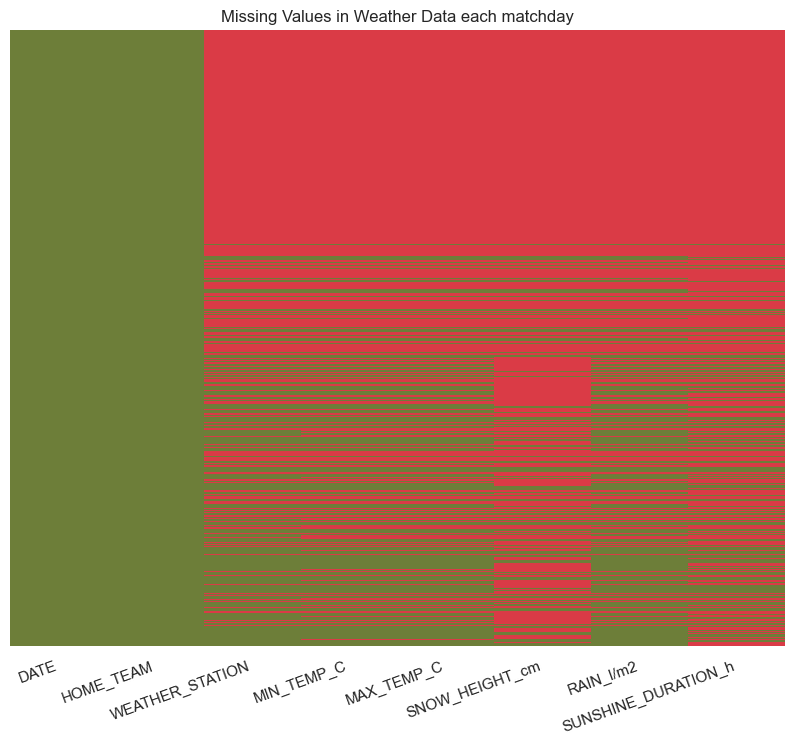

In [4]:
# Heatmap to visualize NaN values
cmap = sns.diverging_palette(100, 10, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1) 
sns.heatmap(df_weather.isnull(), cmap=cmap, cbar=False, yticklabels=False)
plt.title('Missing Values in Weather Data each matchday')
plt.xticks(rotation=20, ha='right')
# Safe to 
plt.savefig('./plots/Missing Values in Weather Data.jpg', format='jpeg', dpi=900)
plt.show()

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 0 to 5813
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 5814 non-null   datetime64[ns]
 1   HOME_TEAM            5814 non-null   object        
 2   WEATHER_STATION      2251 non-null   object        
 3   MIN_TEMP_C           1980 non-null   object        
 4   MAX_TEMP_C           1980 non-null   object        
 5   SNOW_HEIGHT_cm       1193 non-null   object        
 6   RAIN_l/m2            2170 non-null   object        
 7   SUNSHINE_DURATION_h  1425 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 408.8+ KB
